# WiDS 2025
### Sex Patterns in ADHD

### Import

In [1]:
import pandas as pd
import numpy as np
import math


from sklearn.compose import ColumnTransformer
from sklearn.linear_model import MultiTaskElasticNetCV, LogisticRegression, RidgeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer


import seaborn as sns
import matplotlib.pyplot as plt

# Multi-output
from sklearn.multioutput import MultiOutputClassifier

# Multi-task
from sklearn.linear_model import MultiTaskElasticNetCV


In [2]:
source = "TRAIN"
connectome_train = pd.read_csv(f"{source}/{source}_FUNCTIONAL_CONNECTOME_MATRICES.csv")
cat_train = pd.read_csv(f"{source}/{source}_CATEGORICAL_METADATA.csv")
quan_train = pd.read_csv(f"{source}/{source}_QUANTITATIVE_METADATA.csv")
label = pd.read_csv(f"{source}/TRAINING_SOLUTIONS.csv")

In [3]:
source = "TEST"
connectome_test = pd.read_csv(f"{source}/{source}_FUNCTIONAL_CONNECTOME_MATRICES.csv")
cat_test = pd.read_csv(f"{source}/{source}_CATEGORICAL.csv")
quan_test = pd.read_csv(f"{source}/{source}_QUANTITATIVE_METADATA.csv")

In [4]:
#train = connectome_train.merge(quan_train, on= 'participant_id').merge(cat_train, on= 'participant_id')
#train.head(5)

test = connectome_train.merge(quan_test, on= 'participant_id').merge(cat_test, on= 'participant_id')


In [5]:
train = quan_train.merge(cat_train, on= 'participant_id')

In [6]:
train

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,MRI_Track_Age_at_Scan,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,NaN,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,NaN,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,8.239904,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,NaN,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,8.940679,2019,3,0.0,1,3,15,20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,87.80,14,5,14,39,20,15,21,1,...,10.697923,2019,1,0.0,0,2,21,40,21,40
1209,groSbUfkQngM,77.80,14,3,10,32,20,11,23,6,...,13.964750,2016,1,0.0,0,1,18,35,0,0
1210,zmxGvIrOD0bt,16.68,14,3,16,28,15,19,27,3,...,NaN,2015,1,1.0,2,1,18,20,0,0
1211,rOmWFuJCud5G,53.40,14,3,14,34,18,23,23,4,...,12.089094,2018,3,0.0,8,3,21,40,18,45


In [7]:
train.set_index('participant_id',inplace=True)
test.set_index('participant_id',inplace=True)
label.set_index('participant_id',inplace=True)

In [8]:
test

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,MRI_Track_Age_at_Scan,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
participant_id,,,,,,,,,,,,,,,,,,,,,


In [9]:
# Explore Null data
pd.DataFrame(train.isnull().sum(), columns=['null_count']).query('null_count > 0')

,null_count
MRI_Track_Age_at_Scan,360
PreInt_Demos_Fam_Child_Ethnicity,11


In [10]:
# Filter out the row index of 
'''null_index = train[train.isnull().any(axis=1)].index

train = train[~train.index.isin(null_index)]
label = label[~label.index.isin(null_index)]'''

'null_index = train[train.isnull().any(axis=1)].index\n\ntrain = train[~train.index.isin(null_index)]\nlabel = label[~label.index.isin(null_index)]'

In [11]:
label.ADHD_Outcome.value_counts()
# 383 neg, 831 pos

ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

In [12]:
label.Sex_F.value_counts()
# 797 M, 416 F

Sex_F
0    797
1    416
Name: count, dtype: int64

In [13]:
pd.crosstab(label['ADHD_Outcome'], label['Sex_F'], normalize='all')

Sex_F,0,1
ADHD_Outcome,,
0,0.178071,0.136851
1,0.478978,0.206101


In [14]:
pd.crosstab(label['ADHD_Outcome'], label['Sex_F'])

Sex_F,0,1
ADHD_Outcome,,
0,216,166
1,581,250


In [15]:
connectome_train.set_index('participant_id', inplace= True)

In [16]:
df = connectome_train.iloc[:,:5]

# Model Train
Baseline model: Multi-output pipeline for same model.
- Logistic Reg with L1 norm for sparsity and inference enhancement
- NN with 2 output nodes with binary classifier activiation function (Sigmoid)

Performance: Multi-task models with shared features for correlated tasks.
- Multitask Lasso or multitask Elastic Net

### Preprocessing
A pipeline that transform categorical into one-hot code, and quant data into a standard scaler

In [17]:
cat_train = cat_train.drop(['PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race'], axis =1 )
categorical_features = list(cat_train.drop(['participant_id'], axis= 1).columns)
numeric_features = train.drop(cat_train.drop(['participant_id'], axis = 1).columns, axis = 1).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [18]:
# Create ColumnTransformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Mean imputation for missing values
    ('scaler', StandardScaler())                 # Standard scaling
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

### Train - test split


In [19]:
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.3, random_state=527)


In [20]:
pd.DataFrame(x_train.isnull().sum(), columns=['null_count']).query('null_count > 0')

,null_count
MRI_Track_Age_at_Scan,251
PreInt_Demos_Fam_Child_Ethnicity,8


In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(849, 27)
(364, 27)
(849, 2)
(364, 2)


### Visual call-out Functions

In [22]:
def model_result(y_test, y_pred, model_name):
    """
    Compute and display important performance metrics for a classification model, 
    including F1-score, sensitivity, specificity, and a confusion matrix heatmap.

    Parameters:
    -----------
    y_test : array-like or Series (Truth)
    y_pred : array-like or Series (Model prediction)
    model_name : str

    Outputs:
    --------
    - Prints the F1-score, sensitivity (recall), and specificity.
    - Displays a heatmap of the confusion matrix for easier interpretation.

    Usage:
    ------
    1. Pass `y_test` and `y_pred` as arrays (or pandas Series).
    2. Provide a descriptive `model_name`(model and dataset used) to label the confusion matrix plot.
    """
    classes = ['Negative', 'positive']
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Compute confusion matrix
    tn, fp, fn, tp = cm.ravel()

    # Calculate sensitivity and specificity
    sens = tp / (tp + fn)
    spec = tn / (tn + fp)

    # Print results
    print('Accuracy: ', accuracy)
    print(f"Sensitivity (Recall/True Positive Rate): {sens:.2f}")
    print(f"Specificity (True Negative Rate): {spec:.2f}")
    print('f1: ', f1_score(y_test, y_pred))

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix of {model_name}")
    plt.show()

### Logistic Regression for each task

In [23]:
# Create a new DataFrame with transformed data (optional)
#features_transformed = pd.DataFrame(transformed_data, columns=preprocessor.get_feature_names_out()).columns
#features_transformed#[features_transformed.str.contains("cat__|num__")]


In [39]:
train_ct = label.iloc[:,0].count()
train_female_ct = label[label.Sex_F == 1].count()[0]
train_male_ct = train_ct - train_female_ct

train_posADHD_ct = label[label.ADHD_Outcome == 1].count()[0]
train_negADHD_ct = train_ct - train_posADHD_ct

C:\Users\tuana\AppData\Local\Temp/ipykernel_23312/710916087.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_female_ct = label[label.Sex_F == 1].count()[0]
C:\Users\tuana\AppData\Local\Temp/ipykernel_23312/710916087.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_posADHD_ct = label[label.ADHD_Outcome == 1].count()[0]


Accuracy:  0.5824175824175825
Sensitivity (Recall/True Positive Rate): 0.50
Specificity (True Negative Rate): 0.63
f1:  0.4571428571428572


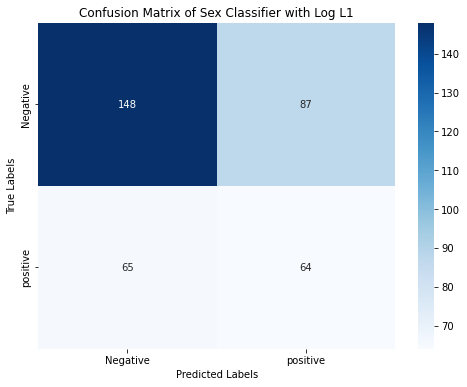

In [24]:
# Class weight for imbalance
weight_positive = train_ct / (2 * train_female_ct)
weight_negative = train_ct / (2 * train_male_ct)
sex_weights = {0: weight_negative, 1: weight_positive}


# Pipeline to preprocess, train using Log Regression with L1 Regularization
pipeline = Pipeline(steps=[
    ('classifier', (LogisticRegression(penalty='l1', solver='liblinear', class_weight= sex_weights)))
])
# Fit the preprocessor on training data
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_train_features = pd.DataFrame(x_train_preprocessed, columns=preprocessor.get_feature_names_out()).columns

# Transform the test data using the same preprocessor
x_test_preprocessed = preprocessor.fit_transform(x_test)
x_test_features = pd.DataFrame(x_test_preprocessed, columns=preprocessor.get_feature_names_out()).columns
pipeline.fit(x_train_preprocessed, y_train.iloc[:,1])

# Fit pipeline on preprocessed training data
log_reg = pipeline.named_steps['classifier']

log_reg.fit(x_train_preprocessed, y_train.iloc[:, 1])
# Predict on preprocessed test data
y_pred = log_reg.predict(x_test_preprocessed)

# Evaluate the model
model_result(y_test['Sex_F'], y_pred, "Sex Classifier with Log L1")

In [25]:
# Find elements in A not in B
values_not_in_b = [item for item in x_train_features if item not in x_test_features]
print("Values in A but not in B:", values_not_in_b)

Values in A but not in B: []


In [ ]:
# Create a new DataFrame with transformed data (optional)
features_transformed = pd.DataFrame(x_test_preprocessed, columns=preprocessor.get_feature_names_out()).columns
#features_transformed#[features_transformed.str.contains("cat__|num__")]
coefficients = log_reg.coef_[0]  # Coefficients for the single task
feature_names = x_train.columns

# Combine coefficients with feature names
coef_data = list(zip(features_transformed, coefficients))
df = pd.DataFrame(coef_data, columns = ['connectome', 'coef'])
df.connectome = df.connectome.apply(lambda x: x.replace("cat__", "")).apply(lambda x: x.replace("num__", ""))
df['rank'] = df['coef'].apply(lambda x: abs(x)).rank(ascending = False)
df = df.set_index('connectome')
df.sort_values('rank')

Accuracy:  0.8241758241758241
Sensitivity (Recall/True Positive Rate): 0.95
Specificity (True Negative Rate): 0.56
f1:  0.8805970149253731


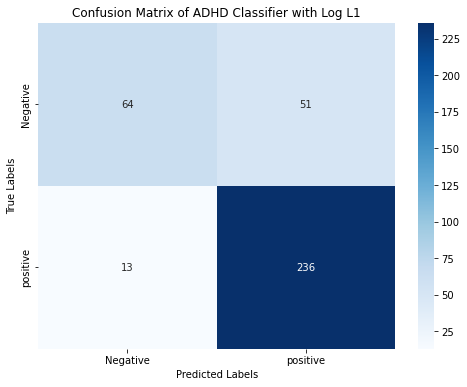

In [30]:
# Class weight for imbalance
total_samples = 382 + 831
weight_positive = total_samples / (2 * 831)
weight_negative = total_samples / (2 * 382)
class_weights = {0: weight_negative, 1: weight_positive}


log_reg.fit(x_train_preprocessed, y_train.iloc[:, 0])
# Predict on preprocessed test data
y_pred = log_reg.predict(x_test_preprocessed)

# Evaluate the model
model_result(y_test['ADHD_Outcome'], y_pred, "ADHD Classifier with Log L1")

In [33]:
# Create a new DataFrame with transformed data (optional)
features_transformed = pd.DataFrame(x_test_preprocessed, columns=preprocessor.get_feature_names_out()).columns
#features_transformed#[features_transformed.str.contains("cat__|num__")]
coefficients = log_reg.coef_[0]  # Coefficients for the single task
feature_names = x_train.columns

# Combine coefficients with feature names
coef_data = list(zip(features_transformed, coefficients))
df = pd.DataFrame(coef_data, columns = ['connectome', 'coef'])
df.connectome = df.connectome.apply(lambda x: x.replace("cat__", "")).apply(lambda x: x.replace("num__", ""))
df['rank'] = df['coef'].apply(lambda x: abs(x)).rank(ascending = False)
df = df.set_index('connectome')
df.sort_values('rank')#.to_csv('ADHD coef_list.csv')

,coef,rank
connectome,,
SDQ_SDQ_Hyperactivity,1.491251,1.0
Basic_Demos_Enroll_Year_2016,-1.047415,2.0
Barratt_Barratt_P1_Occ_10,0.925124,3.0
Barratt_Barratt_P1_Occ_25,-0.698343,4.0
Barratt_Barratt_P1_Edu_6,0.680865,5.0
...,...,...
SDQ_SDQ_Conduct_Problems,0.000000,58.5
Barratt_Barratt_P1_Occ_15,0.000000,58.5
APQ_P_APQ_P_PM,0.000000,58.5
